In [2]:
import json 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from pathlib import Path
from datetime import datetime

In [3]:

input_path = Path("./prob_logs/sics155_c19_vmae/split_0/train/epoch_150_train_probabilities.json")
probabilites_per_video = json.load(open(input_path))
print(f"Input last changed: {datetime.fromtimestamp(input_path.stat().st_mtime)}")
probs_video = list(probabilites_per_video["video_probabilities"].values())[1]

Input last changed: 2025-12-23 10:31:03.557263


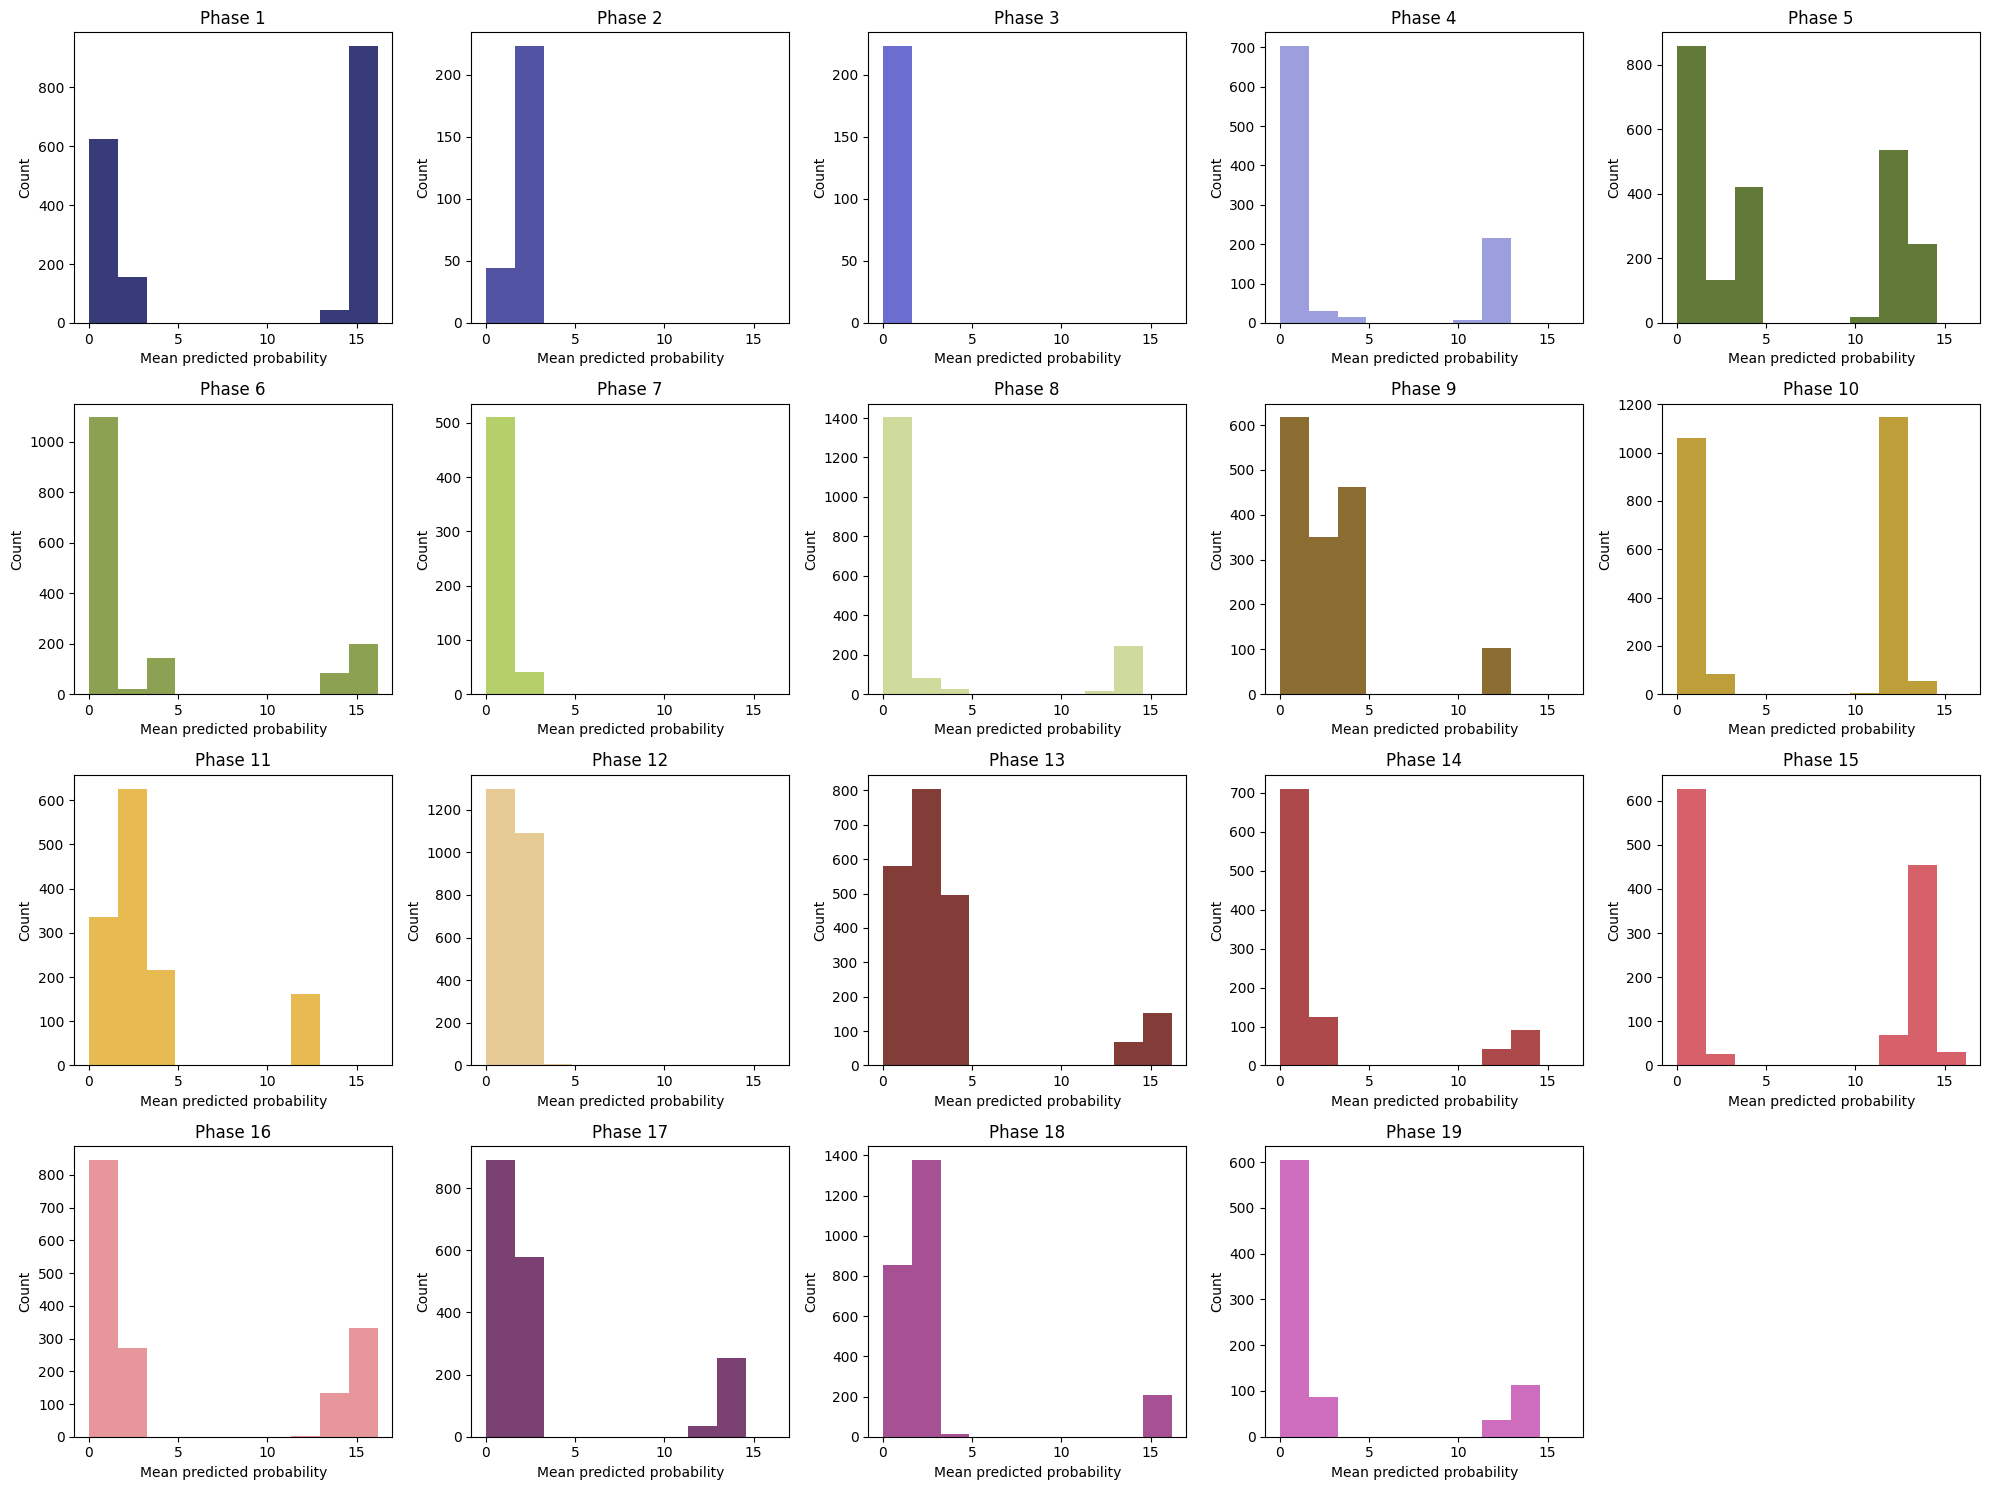

In [4]:
fig = plt.figure(figsize=(20, 15))
gs = GridSpec(4, 5)
colors = plt.get_cmap("tab20b")
grid_pos = [(i // 5, i % 5) for i in range(20)]

for i in range(0, 19):
    row, col = grid_pos[i]
    ax = fig.add_subplot(gs[row, col])
    name = f"Phase {i+1}"
    ax.hist(
            probs_video["logits"][i],
            range=(0, np.max(probs_video["logits"])),
            bins=10,
            label=name,
            color=colors(i),
        )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")
plt.tight_layout()
plt.show()